<a href="https://colab.research.google.com/github/AhmedImtiazKhan/AhmedImtiazKhan.github.io/blob/master/SegmentationDIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pwd
!ls

Mounted at /content/drive
/content
drive  sample_data


In [ ]:
!pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import random
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import math
import ipyplot
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from sklearn.metrics import f1_score
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, ReLU
from tensorflow.keras.layers import BatchNormalization, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import random
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import math
import ipyplot
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from sklearn.metrics import f1_score


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


# New section

In [ ]:
training_file_path = '/content/drive/MyDrive/PROJECTDIP/Segmentation/train_images.npy'
training_labels_path = '/content/drive/MyDrive/PROJECTDIP/Segmentation/training_labels_path.npy'
testing_file_path = '/content/drive/MyDrive/PROJECTDIP/Segmentation/test_images.npy'
testing_labels_path = '/content/drive/MyDrive/PROJECTDIP/Segmentation/testing_labels_path.npy'


training_images, training_masks, testing_images, testing_masks = np.load(training_file_path), np.load(training_labels_path), np.load(testing_file_path), np.load(testing_labels_path) 

print('Shape of training images and training lables is: ', training_images.shape, ',', training_masks.shape)
print('Shape of teting images and testing lables is: ', testing_images.shape, ',', testing_masks.shape)

Shape of training images and training lables is:  (762, 256, 256, 3) , (762, 256, 256)
Shape of teting images and testing lables is:  (76, 256, 256, 3) , (76, 256, 256)


In [ ]:
# basePath = '/content/DatasetMod/train/images/'
# mainPath = mypath
# for fily in onlyfiles:
#     path = basePath + fily
#     path2 = mainPath + fily
#     img = cv2.imread(path2,0)
#     resized = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)
#     cv2.imwrite(path,resized)

# path = '/content/datasetMod/For Project/Segmentation/Training Data/images'
# dirs = os.listdir( path )
# dirs.sort()
# x_train=[]
# from PIL import Image
# import os, sys
# import cv2
# import numpy as np
# path = '/content/dataset/validationMasks/'
# dirs = os.listdir( path )
# dirs.sort()
# x_train=[]
# def load_dataset():
#     # Append images to a list
#     for item in dirs:
#         if os.path.isfile(path+item):
#             im = Image.open(path+item)
#             im = np.array(im)
#             x_train.append(im)


    

    
# # # Convert and save the list of images in '.npy' format
# # imgset=np.array(x_train)
# # np.save("training_file_path.npy",imgset)


# load_dataset()
# # Convert and save the list of images in '.npy' format
# imgset=np.array(x_train)
# np.save("testing_labels_path.npy",imgset)


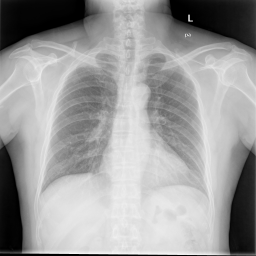
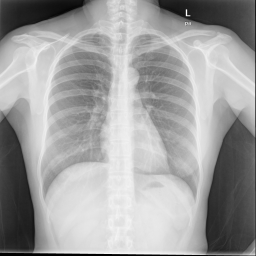
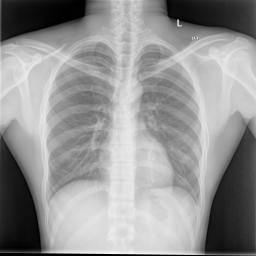
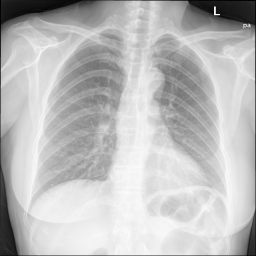
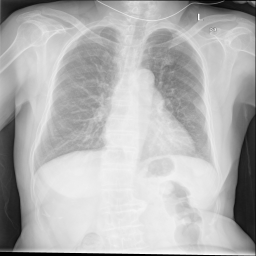
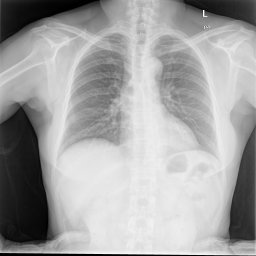
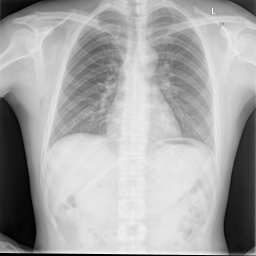
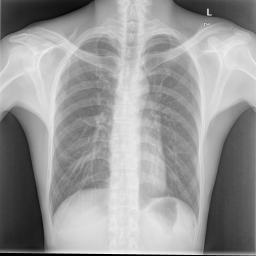
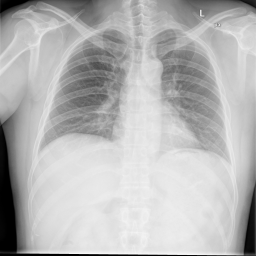
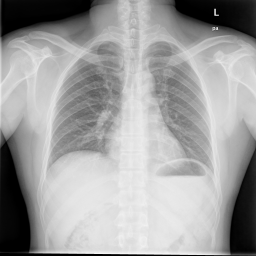


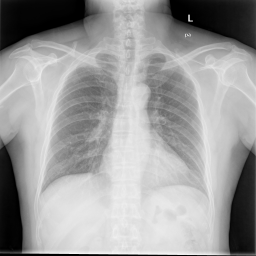
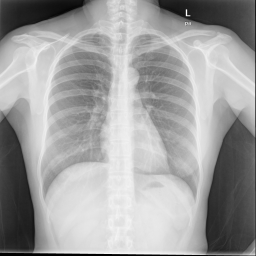
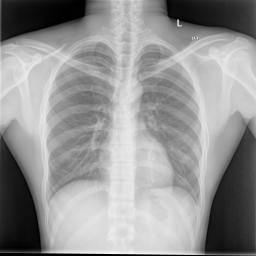
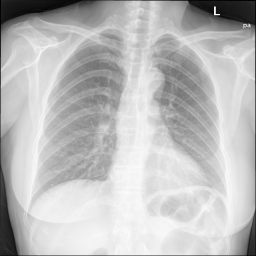
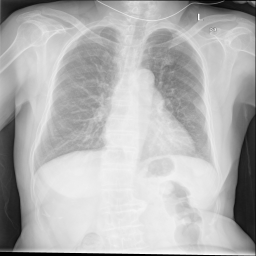
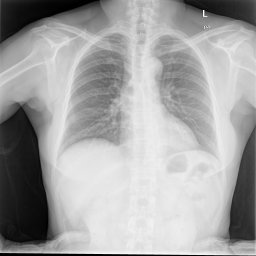
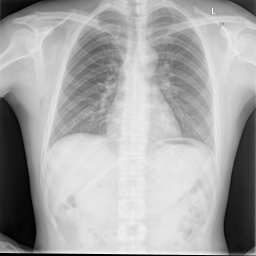
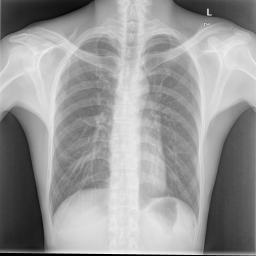
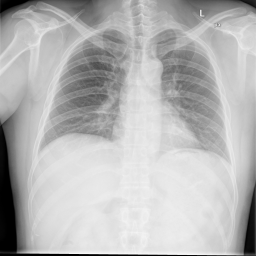
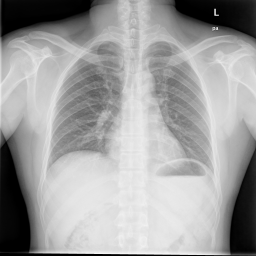


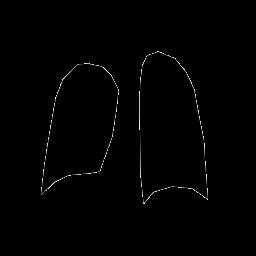
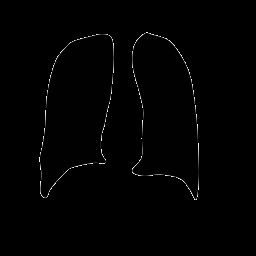
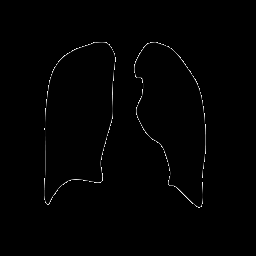
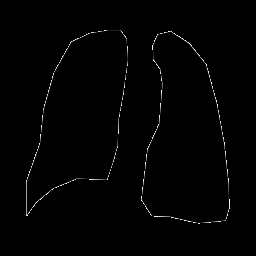
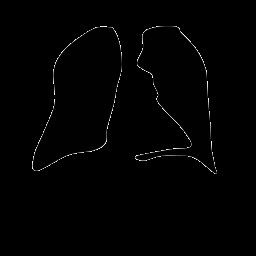
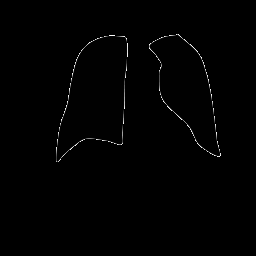
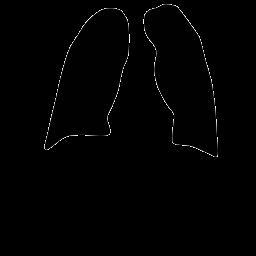
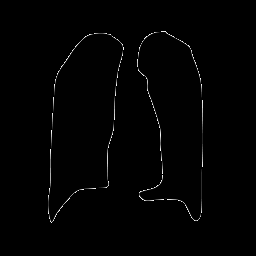
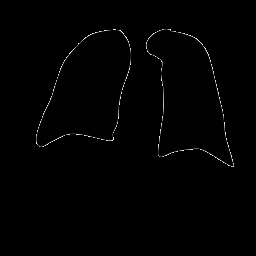
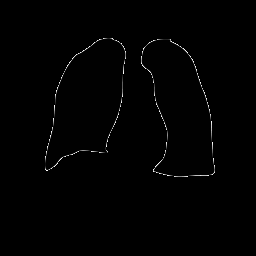


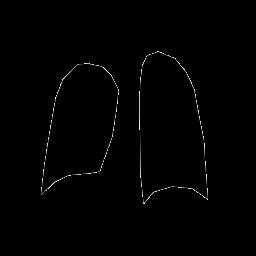
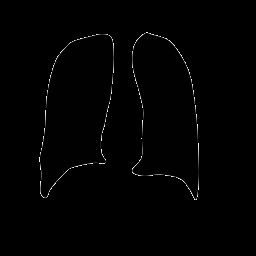
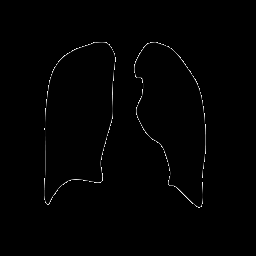
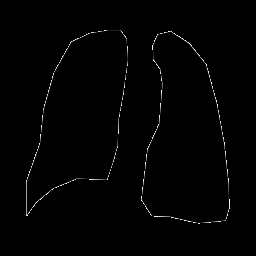
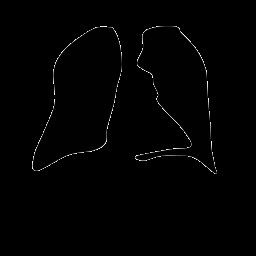
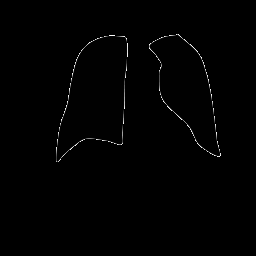
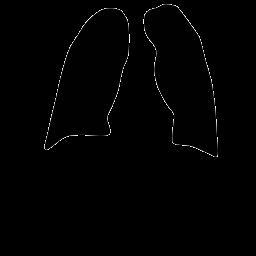
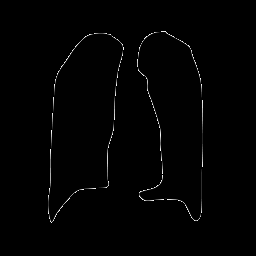
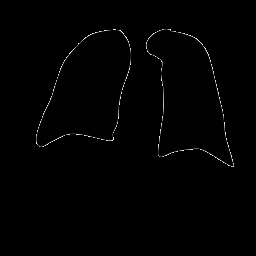
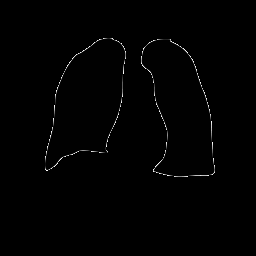

In [ ]:
ipyplot.plot_images(training_images[:,:,:,::-1], max_images=10, img_width=150)
ipyplot.plot_images(training_masks*255, max_images=10, img_width=150)

In [ ]:
inputs = Input((256,256,3))


conv1 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
conv1 = BatchNormalization()(conv1)
conv1 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
batch1 = BatchNormalization()(conv1)
drop1 = Dropout(0.25)(batch1)
pool1 = MaxPooling2D(pool_size=(2, 2))(drop1)


conv2 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
conv2 = BatchNormalization()(conv2)
conv2 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
batch2 = BatchNormalization()(conv2)
drop2 = Dropout(0.25)(batch2)
pool2 = MaxPooling2D(pool_size=(2, 2))(drop2)


conv3 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
conv3 = BatchNormalization()(conv3)
conv3 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
batch3 = BatchNormalization()(conv3)
drop3 = Dropout(0.25)(batch3)
pool3 = MaxPooling2D(pool_size=(2, 2))(drop3)
###############Downsampling ends here#############################


##############Upsampling starts here##############################

up4 = (UpSampling2D(size=(2, 2))(pool3))
up4 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up4)
up4 = BatchNormalization()(up4)
merge4 = concatenate([drop3, up4], axis=3)
conv4 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge4)
conv4 = BatchNormalization()(conv4)
conv4 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
conv4 = BatchNormalization()(conv4)


up7 = (UpSampling2D(size=(2, 2))(conv4))
up7 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up7)
up7 = BatchNormalization()(up7)
merge7 = concatenate([drop2, up7], axis=3)
conv7 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
conv7 = BatchNormalization()(conv7)
conv7 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)
conv7 = BatchNormalization()(conv7)


up8 = (UpSampling2D(size=(2, 2))(conv7))
up8 = Conv2D(1, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up8)
up8 = BatchNormalization()(up8)
merge8 = concatenate([drop1, up8], axis=3)
conv8 = Conv2D(1, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
conv8 = BatchNormalization()(conv8)
conv8 = Conv2D(1, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
conv8 = BatchNormalization()(conv8)

conv10 = Conv2D(1, 1, activation='sigmoid')(conv8)
#######################################################################################################################
#######################################################################################################################


attn_map = concatenate([conv10, inputs], axis=3)


conv11 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(attn_map)
conv11 = BatchNormalization()(conv11)
conv11 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv11)
batch11 = BatchNormalization()(conv11)
drop11 = Dropout(0.25)(batch11)
pool11 = MaxPooling2D(pool_size=(2, 2))(drop11)


conv12 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool11)
conv12 = BatchNormalization()(conv12)
conv12 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv12)
batch12 = BatchNormalization()(conv12)
drop12 = Dropout(0.25)(batch12)
pool12 = MaxPooling2D(pool_size=(2, 2))(drop12)


conv13 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool12)
conv13 = BatchNormalization()(conv13)
conv13 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv13)
batch13 = BatchNormalization()(conv13)
drop13 = Dropout(0.25)(batch13)
pool13 = MaxPooling2D(pool_size=(2, 2))(drop13)
###############Downsampling ends here#############################


##############Upsampling starts here##############################

up14 = (UpSampling2D(size=(2, 2))(pool13))
up14 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up14)
up14 = BatchNormalization()(up14)
merge14 = concatenate([drop13, up14], axis=3)
conv14 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge14)
conv14 = BatchNormalization()(conv14)
conv14 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv14)
conv14 = BatchNormalization()(conv14)


up17 = (UpSampling2D(size=(2, 2))(conv14))
up17 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up17)
up17 = BatchNormalization()(up17)
merge17 = concatenate([drop12, up17], axis=3)
conv17 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge17)
conv17 = BatchNormalization()(conv17)
conv17 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv17)
conv17 = BatchNormalization()(conv17)


up18 = (UpSampling2D(size=(2, 2))(conv17))
up18 = Conv2D(1, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up18)
up18 = BatchNormalization()(up18)
merge18 = concatenate([drop11, up18], axis=3)
conv18 = Conv2D(1, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge18)
conv18 = BatchNormalization()(conv18)
conv18 = Conv2D(1, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv18)
conv18 = BatchNormalization()(conv18)

conv20 = Conv2D(1, 1, activation='sigmoid')(conv18)


my_model = Model(inputs=inputs, outputs=[conv10, conv20])

my_model.compile(optimizer=Adam(lr=1e-4), loss=[BinaryCrossentropy(), BinaryCrossentropy()],
                 loss_weights=[0.5,0.5], metrics=['binary_accuracy'])

my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 8)  224         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 8)  32         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 conv2d_15 (Conv2D)             (None, 256, 256, 1)  2           ['batch_normalization_14[0][0]'] 
                                                                                                  
 concatenate_3 (Concatenate)    (None, 256, 256, 4)  0           ['conv2d_15[0][0]',              
                                                                  'input_1[0][0]']                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 256, 256, 8)  296         ['concatenate_3[0][0]']          
                                                                                                  
 batch_normalization_15 (BatchN  (None, 256, 256, 8)  32         ['conv2d_16[0][0]']              
 ormalization)                                                                                    
          

In [ ]:
def decaying_cosine_annealing_scheduler(epoch):
    """
        A step rate scheduler for setting the learning rate for each epoch.
        :param epoch: current epoch
        :return: learning rate for current epoch
        """
    learning_rate_min = 1e-6
    original_learning_rate_max = 1e-3
    original_cycle_length = 15
    epochs_per_cycle = original_cycle_length-(int(epoch/original_cycle_length))
    learning_rate_max = original_learning_rate_max/((int(epoch/original_cycle_length))+1)
    #print(learning_rate_max,learning_rate_min, epoch, epochs_per_cycle)

    return learning_rate_min + (learning_rate_max - learning_rate_min) * \
           (1 + math.cos(math.pi * (epoch % epochs_per_cycle) / epochs_per_cycle)) / 2


In [ ]:
major_revision, minor_revision = 2,2
model_save_path = '/content/drive/MyDrive/'
log_save_path = '/content/drive/MyDrive/'

file_path = os.path.join(model_save_path, 'm%i-%i.h5' % (major_revision, minor_revision))
checkpoints_callback = tf.keras.callbacks.ModelCheckpoint(file_path, monitor= 'conv2d_31_binary_accuracy', verbose = 1, mode='max', save_best_only=True, save_freq='epoch')
    
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(decaying_cosine_annealing_scheduler, verbose=True)
    
file = open(os.path.join(log_save_path, 'log-%i-%i.txt' % (major_revision, minor_revision)),'a+')
    
text_logging_callback = tf.keras.callbacks.LambdaCallback(
on_epoch_end=lambda epoch, logs: file.write('####EPOCH %i\n' % (epoch + 1) + '#### VALIDATION ACCURACY =%.5f \n' % logs['conv2d_31_binary_accuracy'])
)
    
my_callbacks = [checkpoints_callback, learning_rate_callback, text_logging_callback]

In [ ]:
epochs = 100

print('Training...')

my_model_history = my_model.fit(x=training_images, y=training_masks, epochs=epochs, validation_split = 0.1)


file.close()

Training...
Epoch 1/100
22/22 [==============================] - 27s 419ms/step - loss: 23.7174 - conv2d_15_loss: 53.6830 - conv2d_31_loss: -6.2481 - conv2d_15_binary_accuracy: 0.2714 - conv2d_31_binary_accuracy: 0.2275 - val_loss: 15.1331 - val_conv2d_15_loss: 7.4497 - val_conv2d_31_loss: 22.8165 - val_conv2d_15_binary_accuracy: 0.4430 - val_conv2d_31_binary_accuracy: 0.4944
Epoch 2/100
22/22 [==============================] - 6s 283ms/step - loss: -0.8911 - conv2d_15_loss: 7.8266 - conv2d_31_loss: -9.6088 - conv2d_15_binary_accuracy: 0.3190 - conv2d_31_binary_accuracy: 0.2363 - val_loss: 16.9440 - val_conv2d_15_loss: 20.7381 - val_conv2d_31_loss: 13.1499 - val_conv2d_15_binary_accuracy: 0.7033 - val_conv2d_31_binary_accuracy: 0.4690
Epoch 3/100
22/22 [==============================] - 6s 285ms/step - loss: -31.2651 - conv2d_15_loss: -49.9608 - conv2d_31_loss: -12.5693 - conv2d_15_binary_accuracy: 0.3728 - conv2d_31_binary_accuracy: 0.2454 - val_loss: 13.5893 - val_conv2d_15_loss: 20.

(2, 76, 256, 256, 1)
(76, 256, 256, 1)
(76, 256, 256)
(76, 256, 256) (76, 256, 256)



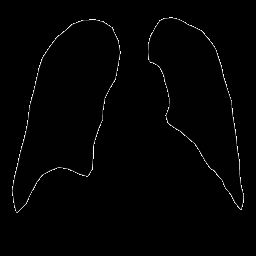
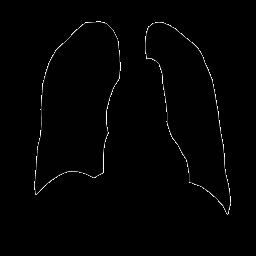
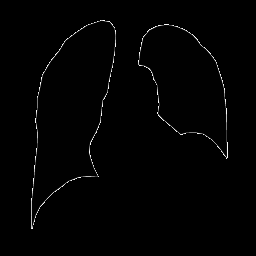
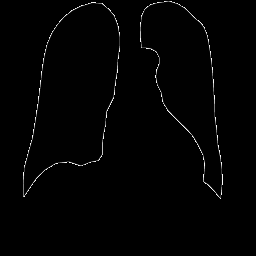
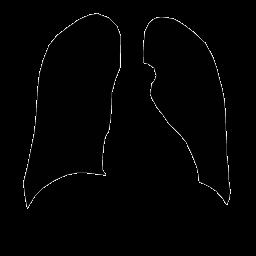
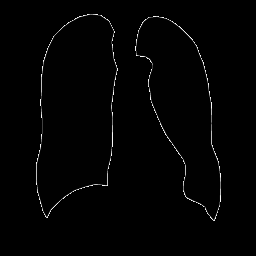
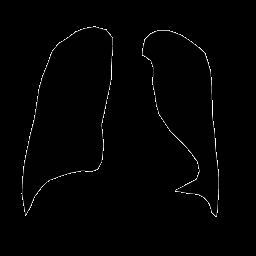
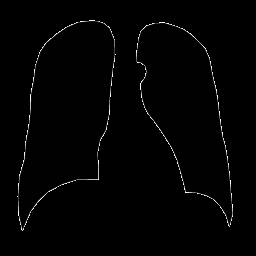
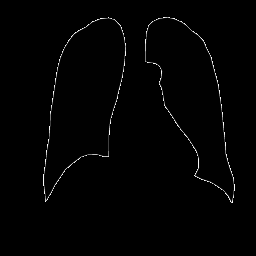
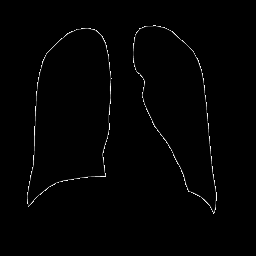


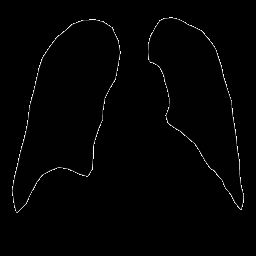
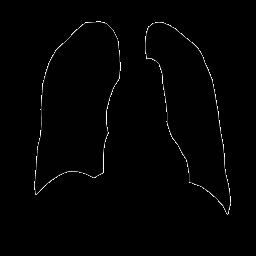
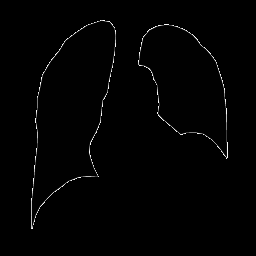
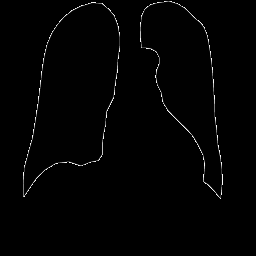
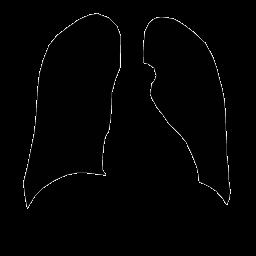
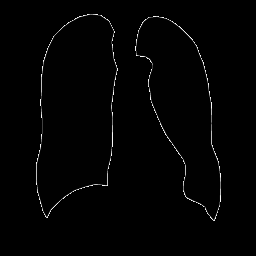
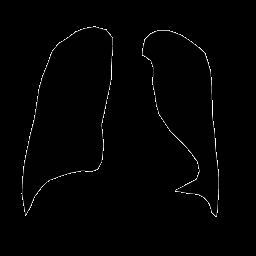
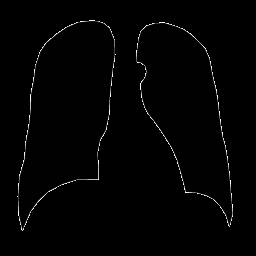
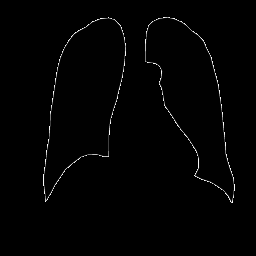
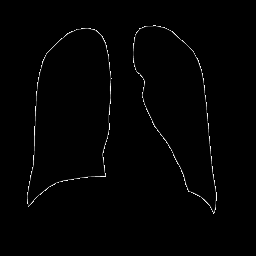


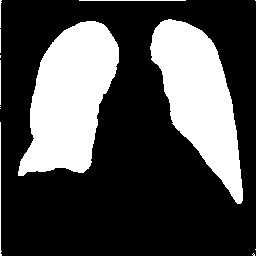
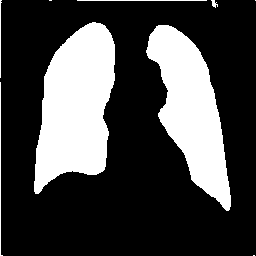
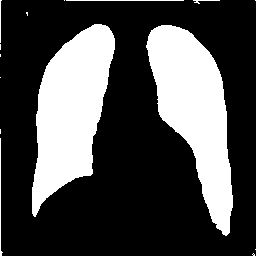
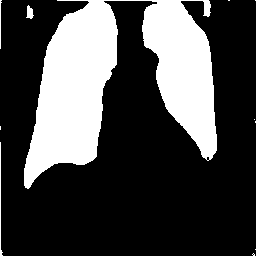
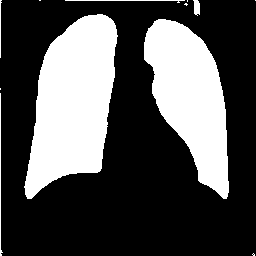
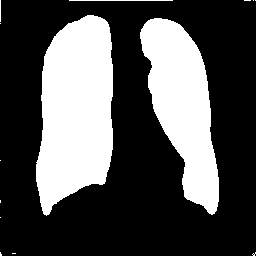
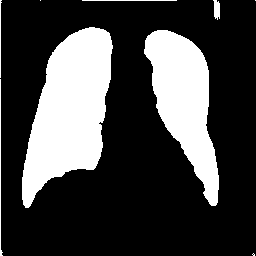
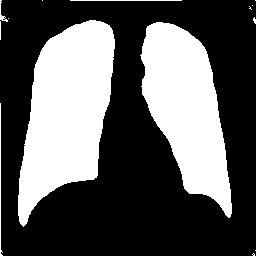
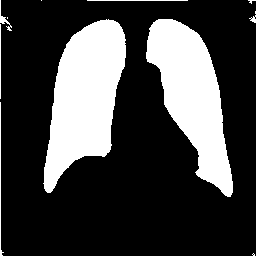
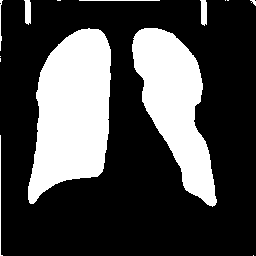


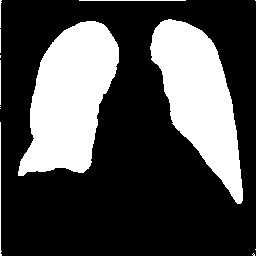
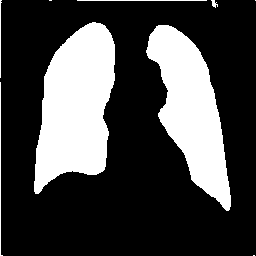
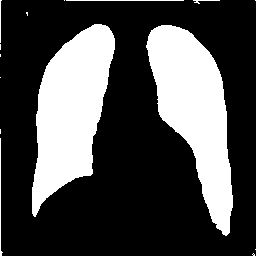
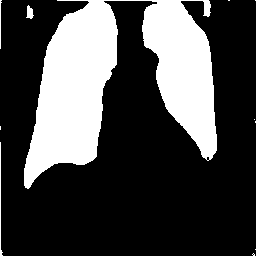
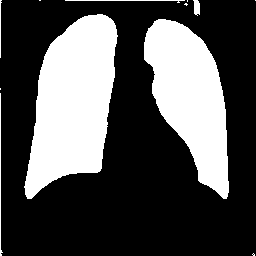
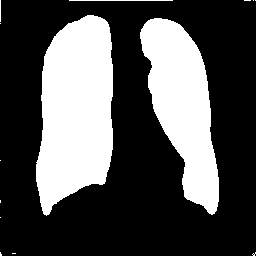
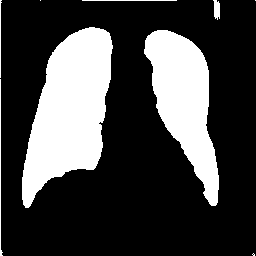
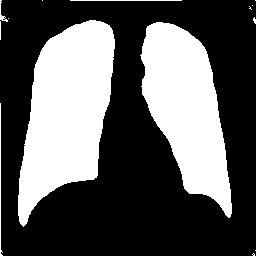
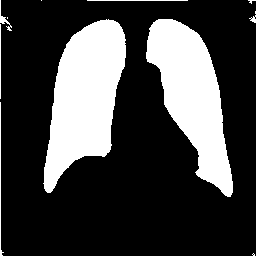
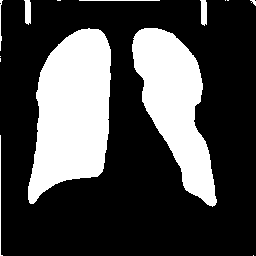

F1 score:  0.6824457268965872


In [ ]:
my_predictions = my_model.predict(testing_images)

print(np.shape(my_predictions))

my_predictions = my_predictions[-1]

print(my_predictions.shape)


my_predictions = np.asarray(my_predictions*255).astype(np.uint8).reshape(76,256,256)
print(my_predictions.shape)


for i in range(len(my_predictions)):
  my_predictions[i,...] = cv2.threshold(my_predictions[i,...].reshape(256,256), 0, 1, cv2.THRESH_OTSU)[1]



ground_truths_masks = np.asarray(testing_masks, dtype=np.uint8)
my_predictions = np.asarray(my_predictions, dtype=np.uint8)

print(np.shape(ground_truths_masks), np.shape(my_predictions))

ipyplot.plot_images(testing_masks*255, max_images=10, img_width=150)
ipyplot.plot_images(my_predictions*255, max_images=10, img_width=150)

my_predictions = my_predictions.reshape(my_predictions.shape[0] * my_predictions.shape[1] * my_predictions.shape[2],1)
ground_truths_masks = ground_truths_masks.reshape(ground_truths_masks.shape[0] * ground_truths_masks.shape[1]
                                                  * ground_truths_masks.shape[2],1)
validation_accuracy = f1_score(ground_truths_masks, my_predictions, average='micro')

print('F1 score: ', validation_accuracy)